# Yelp Academic Dataset Exploratory Data Analysis

Robert Tran

## 1. Project Objectives

- The main objective is this project is to perform exploratory data analysis on the data provided in the yelp academic dataset which is a subset of yelp businesses, reviews, and user data for use in personal, educational, and academic purposes. The analysis will be centered around restaurants within a 50 mile radius from UCSB to identify any patterns and anomalies between restaurant's star rating, review count, price level, distance from University of California, Santa Barbara, noise level listed, and whether or not the restaurants serves alcohol using summary statistics and graphical representations. 

## 2. Project Data Description

- state: string, 2 character state code, if applicable
- business_id: string, 22 character unique string business id
- name: string, the business's name
- latitude: float, longitude coordinate or business
- longitude: float, longitude coordinate or business
- stars: float, star rating, rounded to half-stars
- review_count: integer, number of reviews
- is_open: integer, number of reviews
- categories: an array of strings of business categories
- attributes: object, business attributes to values. note: some attribute values might be objects
- hours: an object of key day to value hours, hours are using a 24hr clock
- distance: float, project created variable that shows distance in miles from UCSB
- NoiseLevel: category, json nested variable shows the noise level listed for business
- RestaurantsPriceRange2: json nested variable shows the price level listed for business

## 3. Data Analysis Process

**A. Defining the question:**
- Are there are patterns and/or anomalies the restaurants around University of California, Santa Barbara's star rating, review count, price level, distance from UCSB, noise level listed, and whether or not the restaurants serves alcohol?

**B. Collecting the data:**
- Convert Yelp's academic dataset from a JavaScript Object Notation format to a comma-seperated variable format for analysis.

**C. Cleaning the data:**
- Subset the data so that only businesses that have restaurant as a category, are still open for operations, and are within a 50 mile radius of University of California, Santa Barbara.
- Extract deeply nested JSON columns into individual columns for analysis. 
- Remove any NULL and NAN values that will not be needed for analysis. 
- Remove UNICODE formating from affected columns.
- Redefine and reoder certain variable types into appropriate category format for efficient memory usage.

**D. Analyzing and Visualizing the data:**
- Create distribution plots for star ratings and price level of restaurants. 
- Create relationship plots to observe relationship between star rating, number of reviews, distance from UCSB, and price range.
- Define summary statistics plots for restaurants performance in star rating and distance from UCSB grouped by price level, noise level, alcohol served.


# Progress in Coding

## Preparation

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io.json import json_normalize 
import seaborn as sns
import json
from haversine import haversine, Unit
import ast
import numpy as np
from numpy import NAN, nan, size
import statistics
from pandas import compat
from matplotlib import colors
from matplotlib import patches
from matplotlib.ticker import PercentFormatter
import statistics
from pandas import compat 

Importing necessary modules for project. 

## Extracting and filtering data

In [9]:
business_json_path = 'yelp_academic_dataset_business.json'
yelpdf = pd.read_json(business_json_path, lines=True)
yelpdf = yelpdf[yelpdf['is_open']==1]
yelpdf = yelpdf[yelpdf['state'] == 'CA']
yelpdf = yelpdf[yelpdf['categories'].str.contains('Restaurants', case = False, na = False)]
yelpdf.dropna(axis = 0, inplace = True)
print(yelpdf.head())
print(yelpdf.info())

                business_id                             name  \
85   IDtLPgUrqorrpqSLdfMhZQ             Helena Avenue Bakery   
141  SZU9c8V2GuREDN5KgyHFJw  Santa Barbara Shellfish Company   
431  ifjluUv4VASwmFqEp8cWlQ                    Marty's Pizza   
470  VeFfrEZ4iWaecrQg6Eq4cg                         Cal Taco   
555  bdfZdB2MTXlT6-RBjSIpQg                       Pho Bistro   

                       address           city state postal_code   latitude  \
85       131 Anacapa St, Ste C  Santa Barbara    CA       93101  34.414445   
141          230 Stearns Wharf  Santa Barbara    CA       93101  34.408715   
431         2733 De La Vina St  Santa Barbara    CA       93105  34.436236   
470  7320 Hollister Ave, Ste 1         Goleta    CA       93117  34.430542   
555  903 Embarcadero Del Norte     Isla Vista    CA       93117  34.412934   

      longitude  stars  review_count  is_open  \
85  -119.690672    4.0           389        1   
141 -119.685019    4.0          2404        1   

**Subset dataframe to only entries that are still open, located in CA, and contains the string 'restaurant' in the category column and dropping any rows with null values.**

## Cleaning and Adjusting Data

In [10]:
sblat = 34.4140
sblong = -119.8489
sb = (sblat, sblong)
for lab, row in yelpdf.iterrows():
    entrylat = yelpdf.loc[lab, 'latitude']
    entrylong = yelpdf.loc[lab, 'longitude']
    entry = (entrylat, entrylong)
    yelpdf.loc[lab, 'distance'] = haversine(sb, entry, unit='mi')
print(yelpdf.head())
print(yelpdf.info())

                business_id                             name  \
85   IDtLPgUrqorrpqSLdfMhZQ             Helena Avenue Bakery   
141  SZU9c8V2GuREDN5KgyHFJw  Santa Barbara Shellfish Company   
431  ifjluUv4VASwmFqEp8cWlQ                    Marty's Pizza   
470  VeFfrEZ4iWaecrQg6Eq4cg                         Cal Taco   
555  bdfZdB2MTXlT6-RBjSIpQg                       Pho Bistro   

                       address           city state postal_code   latitude  \
85       131 Anacapa St, Ste C  Santa Barbara    CA       93101  34.414445   
141          230 Stearns Wharf  Santa Barbara    CA       93101  34.408715   
431         2733 De La Vina St  Santa Barbara    CA       93105  34.436236   
470  7320 Hollister Ave, Ste 1         Goleta    CA       93117  34.430542   
555  903 Embarcadero Del Norte     Isla Vista    CA       93117  34.412934   

      longitude  stars  review_count  is_open  \
85  -119.690672    4.0           389        1   
141 -119.685019    4.0          2404        1   

**Set a reference longitude and latitude of UCSB and used a for loop to iterate through the dataframe to create a distance(miles) column based on entry's own longitude and latitude values as a parameter to the haveresine function.**

In [11]:
yelpdf = yelpdf[yelpdf['distance'] <= 50]
yelpdf = yelpdf[['name', 'city', 'stars', 'review_count', 'attributes', 'categories', 'hours', 'distance']]
print(yelpdf.sort_values(by=['distance'], ascending=False))

                                 name           city  stars  review_count  \
146309           Little Caesars Pizza    Carpinteria    4.5            13   
108638  Simply Marvelous BBQ Catering    Carpinteria    5.0            23   
94029                  El Taco Grande    Carpinteria    3.0           115   
94731              Jersey Mike's Subs    Carpinteria    2.5            15   
129774                     McDonald's    Carpinteria    2.0            70   
...                               ...            ...    ...           ...   
100204                       Root 217         Goleta    3.0            31   
3674                        Romaine's         Goleta    3.5             6   
63222                   Panda Express  Santa Barbara    2.5            18   
28362                 Coral Tree Cafe  Santa Barbara    3.0            28   
25167          A Slice of Woodstock's  Santa Barbara    4.0            10   

                                               attributes  \
146309  {'Rest

**Subset the results to only restaurants less than 50 miles away to be included in data frame. Also subsetted to only keep columns that will be used in analysis.**

In [12]:
yelpdf2 = pd.json_normalize(yelpdf['attributes'])
yelpdf3 = pd.json_normalize(yelpdf['hours'])
yelpdf.reset_index(inplace=True, drop=True)
yelpdf = pd.concat([yelpdf, yelpdf2,yelpdf3], axis=1)
yelpdf.drop(['attributes', 'hours'], axis = 1, inplace=True)
print(yelpdf.head())
print(yelpdf.info())

                              name           city  stars  review_count  \
0             Helena Avenue Bakery  Santa Barbara    4.0           389   
1  Santa Barbara Shellfish Company  Santa Barbara    4.0          2404   
2                    Marty's Pizza  Santa Barbara    4.0            64   
3                         Cal Taco         Goleta    4.0           189   
4                       Pho Bistro     Isla Vista    3.0           184   

                                          categories  distance  \
0  Food, Restaurants, Salad, Coffee & Tea, Breakf...  9.019094   
1  Live/Raw Food, Restaurants, Seafood, Beer Bar,...  9.348724   
2                                 Pizza, Restaurants  7.162725   
3  Burgers, Cafes, Restaurants, Mexican, American...  2.223655   
4  Food, Restaurants, Chinese, Bubble Tea, Vietna...  0.385058   

  RestaurantsTakeOut  NoiseLevel Caters  \
0               True  u'average'   True   
1               True  u'average'  False   
2               True   'avera

**Convert the list of dictionaries attributes and hours columns into other columns based on key/value pair and concating into original dataframe by index.**

In [12]:
yelpdf['Ambience'] = yelpdf['Ambience'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
yelpdf['GoodForMeal'] = yelpdf['GoodForMeal'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)
yelpdf3 = pd.json_normalize(yelpdf['Ambience'])
yelpdf4 = pd.json_normalize(yelpdf['GoodForMeal'])
yelpdf = pd.concat([yelpdf,yelpdf3,yelpdf4], axis=1)
print(yelpdf.head())
print(yelpdf.info())

                              name           city  stars  review_count  \
0             Helena Avenue Bakery  Santa Barbara    4.0           389   
1  Santa Barbara Shellfish Company  Santa Barbara    4.0          2404   
2                    Marty's Pizza  Santa Barbara    4.0            64   
3                         Cal Taco         Goleta    4.0           189   
4                       Pho Bistro     Isla Vista    3.0           184   

                                          categories  distance  \
0  Food, Restaurants, Salad, Coffee & Tea, Breakf...  9.019094   
1  Live/Raw Food, Restaurants, Seafood, Beer Bar,...  9.348724   
2                                 Pizza, Restaurants  7.162725   
3  Burgers, Cafes, Restaurants, Mexican, American...  2.223655   
4  Food, Restaurants, Chinese, Bubble Tea, Vietna...  0.385058   

  RestaurantsTakeOut  NoiseLevel Caters  \
0               True  u'average'   True   
1               True  u'average'  False   
2               True   'avera

**Convert the nested dictionaries 'Ambience' and 'GoodForMeal' attribute columns into other column. se ast function since the dictionary is in a string format and will need to be changed in order for json_normalize function to convert. Concat the results based on index to the oringal dataframe.**

In [13]:
def remove_another(x):
  string = str(x)
  aaa = string.replace("u'", "").replace("'", "")
  return aaa

**Function for removing unicode formating from affected columns.**

In [14]:
update_categories = {'1':'\$','2':'\$\$','3':'\$\$\$','4':'\$\$\$\$'}
yelpdf['RestaurantsPriceRange2'] = yelpdf['RestaurantsPriceRange2'].astype("category")
yelpdf['RestaurantsPriceRange2'] = yelpdf['RestaurantsPriceRange2'].replace(update_categories)
yelpdf['RestaurantsPriceRange2'] = yelpdf['RestaurantsPriceRange2'].cat.reorder_categories(new_categories = ['\$', '\$\$', '\$\$\$', '\$\$\$\$'], ordered = True)
print(yelpdf['RestaurantsPriceRange2'])

0      \$\$
1      \$\$
2      \$\$
3        \$
4        \$
       ... 
624    \$\$
625    \$\$
626    \$\$
627      \$
628    \$\$
Name: RestaurantsPriceRange2, Length: 629, dtype: category
Categories (4, object): ['\$' < '\$\$' < '\$\$\$' < '\$\$\$\$']


**Rename the categories in the price range columns and ordering in order from price level.**

In [15]:
yelpdf['NoiseLevel'] = yelpdf['NoiseLevel'].astype(str)
yelpdf['NoiseLevel'] = yelpdf['NoiseLevel'].apply(remove_another)
print(yelpdf['NoiseLevel'].value_counts())

average      388
nan          158
quiet         48
loud          34
very_loud      1
Name: NoiseLevel, dtype: int64


**Remove unicode from NoiseLevel column using function**

In [21]:
update_NoiseLevel = {'average': 'Average', 'loud': 'Loud', 'quiet': 'Quiet', 'very_loud': 'Very Loud', 'unclassified': 'Unclassified'}
yelpdf['NoiseLevel'] = yelpdf['NoiseLevel'].astype('category')
yelpdf['NoiseLevel'] = yelpdf['NoiseLevel'].replace(update_NoiseLevel)
yelpdf['NoiseLevel'] = yelpdf['NoiseLevel'].astype(str)
yelpdf_noise = yelpdf[yelpdf['NoiseLevel'] != 'nan']
print(yelpdf_noise['NoiseLevel'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      Average
1      Average
2      Average
3      Average
4      Average
        ...   
623    Average
624      Quiet
625    Average
626    Average
628    Average
Name: NoiseLevel, Length: 471, dtype: object>


**Rename noise level categories and creating a subset dataframe where NAN values are dropped from analysis.**

In [24]:
yelpdf_noise['NoiseLevel'].cat.reorder_categories(new_categories = ['Quiet', 'Average', 'Loud', 'Very Loud'], ordered = True)

0      Average
1      Average
2      Average
3      Average
4      Average
        ...   
623    Average
624      Quiet
625    Average
626    Average
628    Average
Name: NoiseLevel, Length: 471, dtype: category
Categories (4, object): ['Quiet' < 'Average' < 'Loud' < 'Very Loud']

**Reordering NoiseLevel column in order from quietest to loudest.**

In [45]:
yelpdf['Alcohol'] = yelpdf['Alcohol'].astype(str)
yelpdf['Alcohol'] = yelpdf['Alcohol'].apply(remove_another)
print(yelpdf['Alcohol'].value_counts())

beer_and_wine    226
none             166
full_bar         140
nan               97
Name: Alcohol, dtype: int64


**Remove unicode from Alcohol column using function.**

In [46]:
yelpdf_alc = yelpdf[yelpdf['Alcohol'] != 'nan']
print(yelpdf_alc['Alcohol'].value_counts())

beer_and_wine    226
none             166
full_bar         140
Name: Alcohol, dtype: int64


**Rename noise level categories and creating a subset dataframe where NAN values are dropped from analysis.**

In [69]:
update_alc = {'none':'None','beer_and_wine':'Beer and Wine', 'full_bar':'Full Bar'}
yelpdf_alc['Alcohol'].replace(update_alc)

0               None
1      Beer and Wine
2               None
3      Beer and Wine
4               None
           ...      
624         Full Bar
625    Beer and Wine
626    Beer and Wine
627             None
628    Beer and Wine
Name: Alcohol, Length: 532, dtype: category
Categories (3, object): ['Beer and Wine', 'Full Bar', 'None']

In [70]:
yelpdf_alc['Alcohol'].cat.reorder_categories(new_categories = ['None','Beer and Wine', 'Full Bar'], ordered = True)

0               None
1      Beer and Wine
2               None
3      Beer and Wine
4               None
           ...      
624         Full Bar
625    Beer and Wine
626    Beer and Wine
627             None
628    Beer and Wine
Name: Alcohol, Length: 532, dtype: category
Categories (3, object): ['None' < 'Beer and Wine' < 'Full Bar']

**Rename and reorder the categories in the Alcohol columns.**

## Visualize and Analyzing Data

In [71]:
font = {'weight': 'bold', 'size': 12}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (14,7)
plt.style.use('ggplot')

**Set the font, figure size, and style for the plots.**

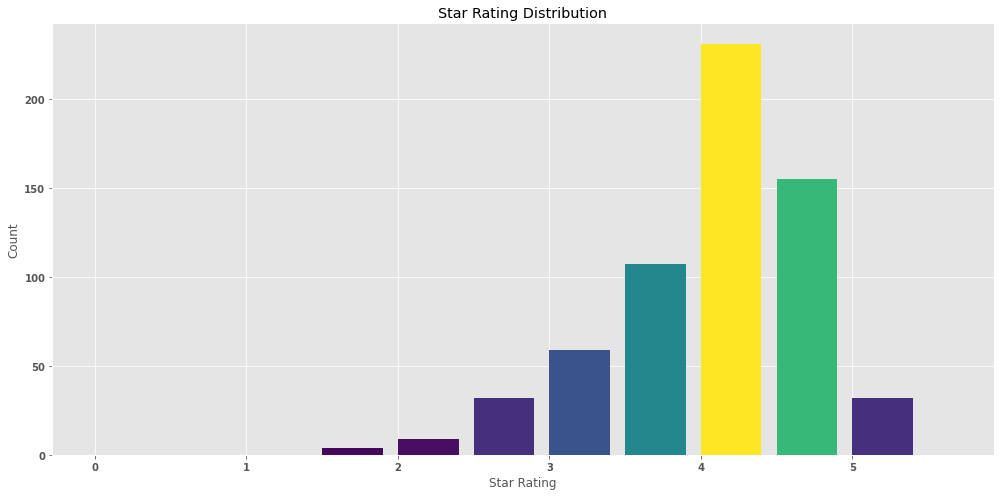

In [72]:
bins = list(np.arange(0, 5.7, 0.05))
fig, ax = plt.subplots(1, tight_layout=True)
N, bins, patches = ax.hist(yelpdf['stars'], bins=bins, width=0.4, )
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

**Create a histogram plot for the distribution of Star Ratings and color coding by normalized density.**

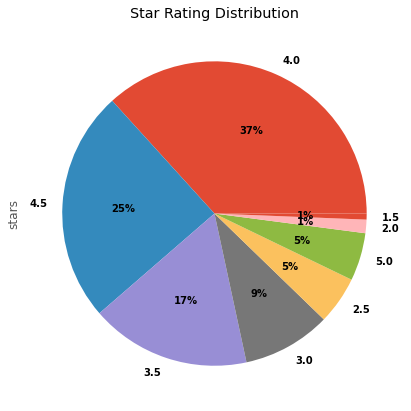

In [40]:
yelpdf['stars'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Star Rating Distribution')
plt.show()

**Create a pie plot for the distribution of Star Ratings normalized.**

We can see that restraurants with 4 star ratings have the highest frequency in the data, accounting for 37% while 1.5 and 2 star ratings have the lowest with 1% each. 

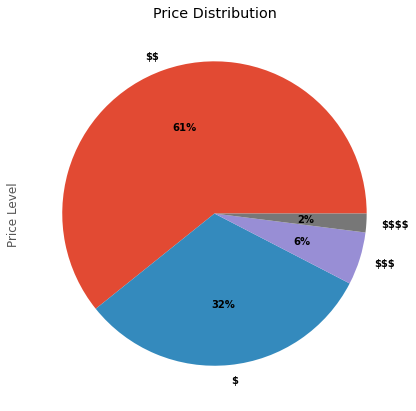

In [73]:
yelpdf['RestaurantsPriceRange2'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Price Distribution')
plt.ylabel('Price Level')
plt.show()

**Create a pie plot for the distribution of price normalized.**

We can see that restaurants with a price level of '$$' and '$' account for most of the data.

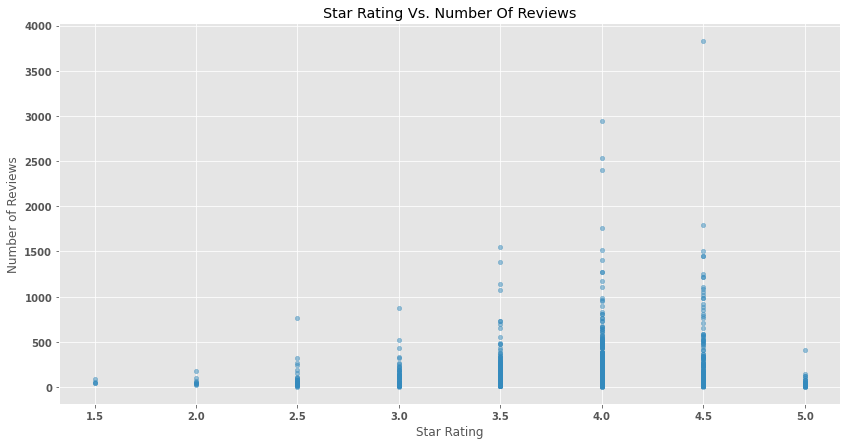

In [74]:
yelpdf.plot.scatter(x='stars', y= 'review_count', alpha= 0.5)
plt.title('Star Rating Vs. Number Of Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

**Create a scatter plot to observe Star Rating vs. Number of Reviews.**

Restaurants between 3.5 and 4.5 star ratings typically having the highest amount of yelp reviews. 

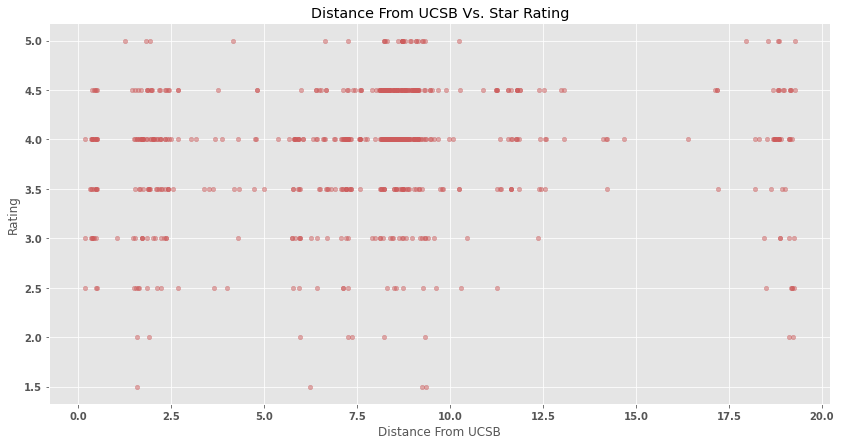

In [75]:
yelpdf.plot.scatter(x='distance', y= 'stars', alpha= 0.5, color='indianred')
plt.title('Distance From UCSB Vs. Star Rating')
plt.xlabel('Distance From UCSB')
plt.ylabel('Rating')
plt.show()

**Create a scatter plot to observe Star Rating vs. distance from UCSB.**

There is a great proportion of restaurants above 3 star rating being less than 10 miles from UCSB while there are some outliers that span farther than 15 miles from UCSB. 

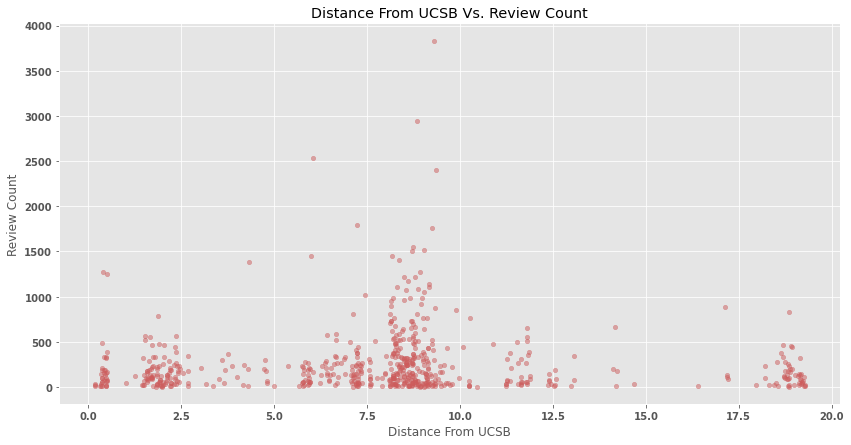

In [76]:
yelpdf.plot.scatter(x='distance', y= 'review_count', alpha= 0.5, color='indianred')
plt.title('Distance From UCSB Vs. Review Count')
plt.xlabel('Distance From UCSB')
plt.ylabel('Review Count')
plt.show()

**Create a scatter plot to observe distance from UCSB vs. review count.**

Most restaurants have a range between 0 and 500 reviews with some restaurants that are less than 10 miles from UCSB having a outliers of higher than 1000 reviews.

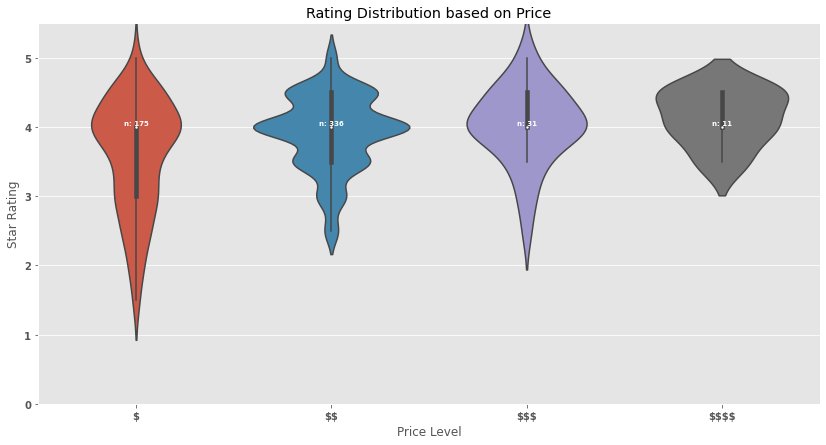

In [84]:
ax = sns.violinplot(x="RestaurantsPriceRange2", y="stars",
                    data=yelpdf)
medians = yelpdf['stars'].groupby(yelpdf['RestaurantsPriceRange2']).median().values
nobs = yelpdf['RestaurantsPriceRange2'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='bold')
plt.title('Rating Distribution based on Price')
plt.xlabel('Price Level')
plt.ylabel('Star Rating')
plt.setp(plt.gca(),ylim=(0,5.5))
plt.show()

**Create a violin plot to observe distrbution of star rating across different price ranges of restaurants.**

Restaurants with a price level of 1 $ have the widest interquartile ranges in star rating as well as highest amount of observations. Restaurants with a price level of 4  has the least widest interquartile ranges with the least amount of observations. All restaurants by price level have very similar medians.

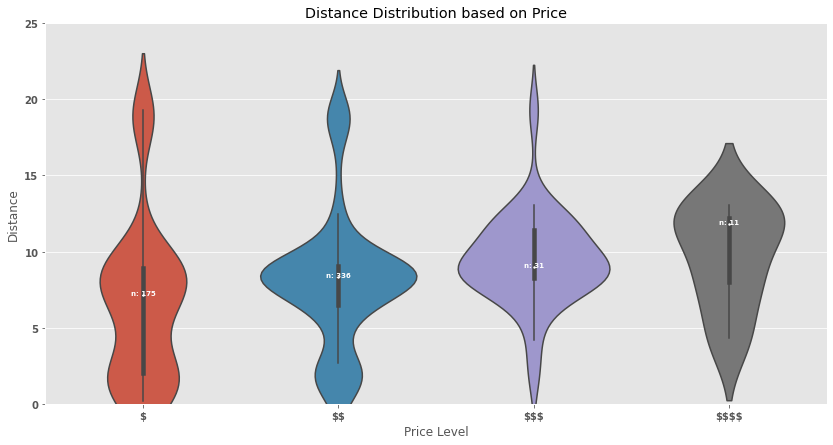

In [91]:
ax = sns.violinplot(x="RestaurantsPriceRange2", y="distance",
                    data=yelpdf)
medians = yelpdf['distance'].groupby(yelpdf['RestaurantsPriceRange2']).median().values
nobs = yelpdf['RestaurantsPriceRange2'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='bold')
plt.title('Distance Distribution based on Price')
plt.xlabel('Price Level')
plt.ylabel('Distance')
plt.setp(plt.gca(),ylim=(0,25))
plt.show()

**Create a violin plot to observe distrbution of distance across different price ranges of restaurants.**

Restaurants with a price level of 1 $ have the widest interquartile ranges in distance from UCSB. Restaurants with a price level of 2 and above have similar interquartile range length for distance. Restaurants with a price level of 4 has the highest median for distance from UCSB but also the lowest amount of observations. 

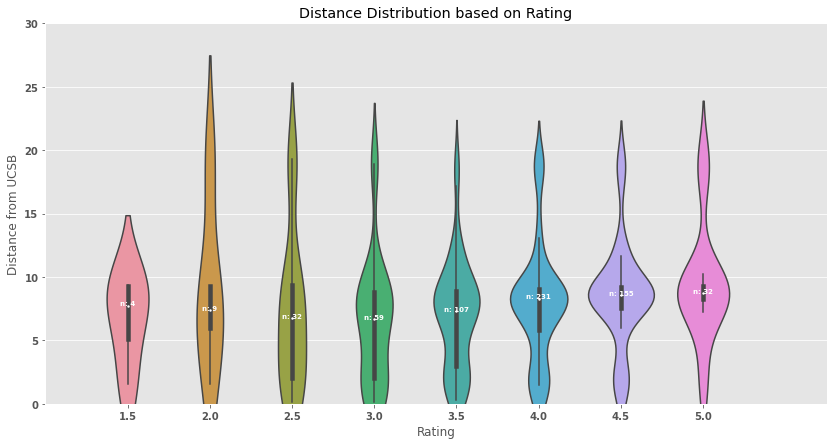

In [92]:
ax = sns.violinplot(x="stars", y="distance",
                    data=yelpdf)
medians = yelpdf['distance'].groupby(yelpdf['stars']).median().values
nobs = yelpdf['stars'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='bold')
plt.title('Distance Distribution based on Rating')
plt.xlabel('Rating')
plt.ylabel('Distance from UCSB')
plt.setp(plt.gca(),xlim=(-1,8.5))
plt.setp(plt.gca(),ylim=(0,30))
plt.show()

**Create a violin plot to observe distribution of distance from UCSB across different star ratings.**

We can see that restaurants with the 4.5 and 5 star rated restaurants have the narrowest interquartile range in distance from UCSB between about 12 and 7 miles. Restaurants between 2.5 and 3.5 rating have the widest interquartile ranges in distance.  

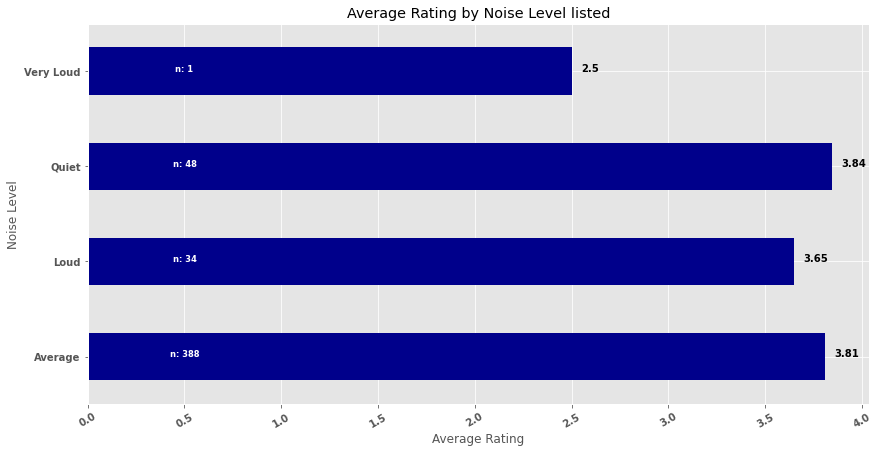

In [93]:
yelpdf_noise['stars'].groupby(yelpdf_noise['NoiseLevel']).mean().plot.barh(color='darkblue', capsize=5)
medians = yelpdf.groupby(['NoiseLevel'])['stars'].mean().values
nobs = yelpdf.groupby(['NoiseLevel'])['stars'].agg(['count'])
nobs = ["n: " + str(i) for s in nobs.values for i in s]
pos = range(len(nobs))
for index, value in enumerate(yelpdf_noise['stars'].groupby(yelpdf_noise['NoiseLevel']).mean()):
    plt.text(value+0.05, index,
             str(round(value, 2)))
    plt.text(0.5, pos[index], nobs[index], horizontalalignment='center', size='small', color='w', weight='bold')
plt.title('Average Rating by Noise Level listed')
plt.xlabel('Average Rating')
plt.ylabel('Noise Level')
plt.xticks(rotation=30)
plt.show()

**Create a bar plot to see average rating across different noise levels listed across restaurants.**

We can see that quiet and average noise level listed restaurants have similar averages in star rating while loud has a slightly lower average. Very loud listed restaurants have the lowest average rating although this is based off only one observation. 

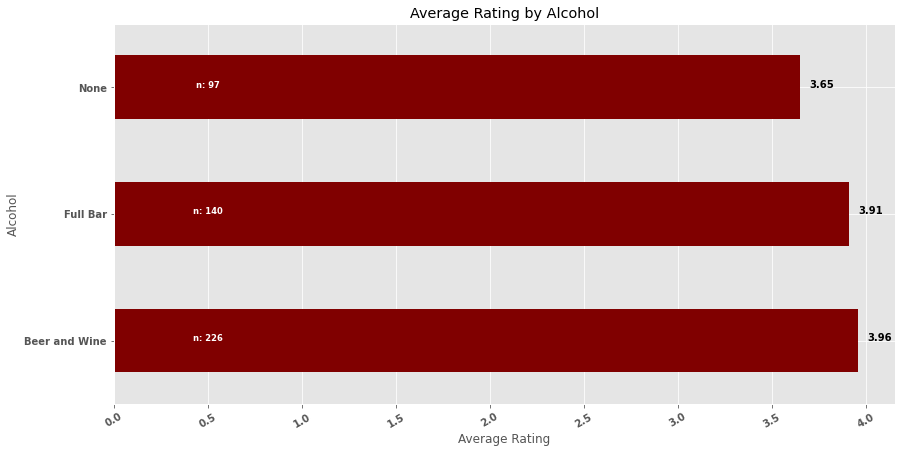

In [94]:
yelpdf_alc['stars'].groupby(yelpdf_alc['Alcohol']).mean().plot.barh(color='maroon', capsize=5)
medians = yelpdf.groupby(['Alcohol'])['stars'].mean().values
nobs = yelpdf.groupby(['Alcohol'])['stars'].agg(['count'])
nobs = ["n: " + str(i) for s in nobs.values for i in s]
pos = range(len(nobs))
for index, value in enumerate(yelpdf_alc['stars'].groupby(yelpdf_alc['Alcohol']).mean()):
    plt.text(value+0.05, index,
             str(round(value, 2)))
    plt.text(0.5, pos[index], nobs[index], horizontalalignment='center', size='small', color='w', weight='bold')
plt.title('Average Rating by Alcohol')
plt.xlabel('Average Rating')
plt.ylabel('Alcohol')
plt.xticks(rotation=30)
plt.show()

**Create a bar plot to see average rating across different alchohol served listed across restaurants.**

Restaurants that serve both a beer and wine bar as well as a full bar have similar average ratings while restaurants that serve no alcohol has a slightly lower average. 

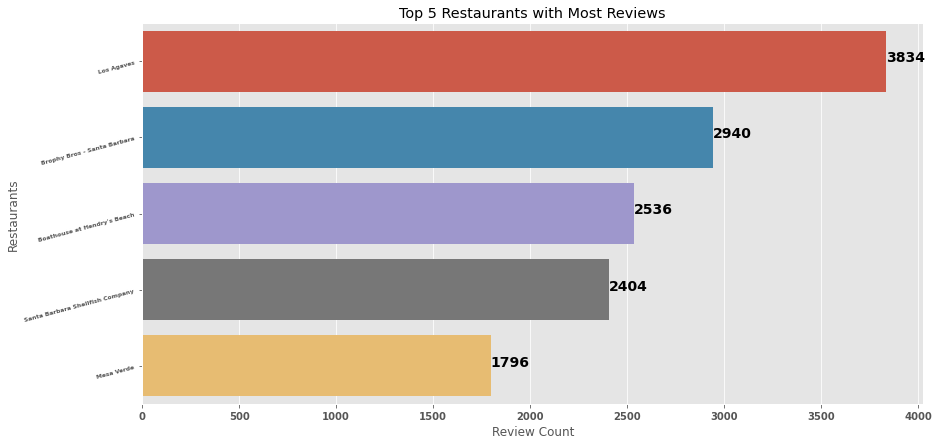

                                name  review_count  stars  distance  \
543                       Los Agaves          3834    4.5  9.295918   
184      Brophy Bros - Santa Barbara          2940    4.0  8.858645   
583      Boathouse at Hendry's Beach          2536    4.0  6.039651   
1    Santa Barbara Shellfish Company          2404    4.0  9.348724   
602                       Mesa Verde          1796    4.5  7.225384   

    RestaurantsPriceRange2  
543                   \$\$  
184                   \$\$  
583                   \$\$  
1                     \$\$  
602                   \$\$  


In [96]:
top5count = yelpdf[['name','review_count','stars','distance','RestaurantsPriceRange2']].sort_values(by='review_count', ascending=False)[:5]
sns.barplot(x=top5count.review_count, y = top5count.name)
plt.xlabel('Review Count')
plt.ylabel('Restaurants')
plt.title('Top 5 Restaurants with Most Reviews')
plt.yticks(rotation=15, fontsize=6)
for  index, value in enumerate(top5count.review_count):
    plt.text(value, index, str(value), fontweight='bold', fontsize=14)
plt.show()
print(top5count)

**Create a bar plot to see top 5 restaurants with highest review count.**

The rest of these restaurants information such as star rating and distance from UCSB are included below plot. 